# Epidemiology with multiple variants: rabbits and myxoma


In [91]:
import abc
import dataclasses
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from pydantic import BaseModel
import matplotlib.pyplot as plt

plt.style.use(["seaborn-notebook", "seaborn-darkgrid"])
sns.set_palette("viridis")
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["xtick.major.size"] = 2
mpl.rcParams["ytick.major.size"] = 2
mpl.rcParams["legend.frameon"] = True
mpl.rcParams["font.family"] = "sans"

# Model Implementation


In [92]:
class SimulationBaseModel(BaseModel):
    class Config:
        frozen = True
        extra = "forbid"
        min_anystr_length = 1
        anystr_strip_whitespace = True

In [98]:
class Strain(SimulationBaseModel):
    name: str


s1 = Strain(name="I")
s2 = Strain(name="II")
s3 = Strain(name="IIIA")
s4 = Strain(name="IIIB")
s5 = Strain(name="IV")
s6 = Strain(name="V")
strains = [s1, s2, s3, s4, s5, s6]

In [99]:
class Genotype(SimulationBaseModel):
    name: str
    n: int
    b: float


g1 = Genotype(n=100.0, b=0.2, name="AA")
g2 = Genotype(n=100.0, b=0.2, name="Aa")
g3 = Genotype(n=100.0, b=0.2, name="aa")
genotypes = [g1, g2, g3]

In [101]:
class InfectionInteraction(SimulationBaseModel):
    n: int
    beta: float
    alpha: float
    gamma: float
    strain: Strain
    genotype: Genotype


interactions = [
    InfectionInteraction(
        strain=s1, genotype=g1, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s1, genotype=g2, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s1, genotype=g3, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s2, genotype=g1, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s2, genotype=g2, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s2, genotype=g3, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s3, genotype=g1, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s3, genotype=g2, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s3, genotype=g3, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s4, genotype=g1, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s4, genotype=g2, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s4, genotype=g3, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s5, genotype=g1, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s5, genotype=g2, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s5, genotype=g3, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s6, genotype=g1, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s6, genotype=g2, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
    InfectionInteraction(
        strain=s6, genotype=g3, n=100.0, beta=1.0, alpha=0.2, gamma=0.0001
    ),
]

In [84]:
class CSEIR(SimulationBaseModel):
    a: float
    N: int
    K: int
    dt: float
    strains: list[Strain]
    genotypes: list[Genotype]
    interactions: list[InfectionInteraction]
    R0: int

    @staticmethod
    def dSdt(b, a, K, S, beta, I, size):
        return a * size * (1 - size / K) - b * S - np.sum(beta * I * S / size)

    @staticmethod
    def dIdt(b, gamma, alpha, S, beta, I, size):
        return -b * I - alpha * I + beta * I * S / size - gamma * I

    @staticmethod
    def dRdt(b, R, gamma, I):
        return -b * R + np.sum(gamma * I)

    def simulation(self):
        # Set simulation constants
        steps = int(self.N / self.dt)
        # strains = len(self.I0)

        print(steps)

    #     # Initialise parameter wrappers
    #     beta = np.array([i.beta for i in self.I0], dtype=float)
    #     alpha = np.array([i.alpha for i in self.I0], dtype=float)
    #     gamma = np.array([i.gamma for i in self.I0], dtype=float)

    #     # Initialise result arrays
    #     S = np.zeros(steps, dtype=float)
    #     I = np.zeros((steps, strains), dtype=float)
    #     R = np.zeros(steps, dtype=float)
    #     T = np.zeros(steps, dtype=float)

    #     # Set starting values
    #     S[0] = self.S0
    #     I[0] = [i.n for i in self.I0]
    #     R[0] = self.R0

    #     # Cycle through each time step to iterate
    #     for ind in range(1, steps):
    #         # Calculate the derivatives
    #         size = S[ind - 1] + np.sum(I[ind - 1]) + R[ind - 1]
    #         dS = SEIR.dSdt(self.b, self.a, self.K, S[ind - 1], beta, I[ind - 1], size)
    #         dI = SEIR.dIdt(self.b, gamma, alpha, S[ind - 1], beta, I[ind - 1], size)
    #         dR = SEIR.dRdt(self.b, R[ind - 1], gamma, I[ind - 1])
    #         # Update each results group
    #         S[ind] = S[ind - 1] + self.dt * dS
    #         I[ind] = I[ind - 1] + self.dt * dI
    #         R[ind] = R[ind - 1] + self.dt * dR
    #         T[ind] = T[ind - 1] + self.dt

    #     # Create a dataframe to return
    #     df = pd.DataFrame()
    #     df["Susceptible"] = S
    #     df["Recovered"] = R
    #     df["Time"] = T
    #     for i in range(strains):
    #         df[f"{STRAINS[i]}"] = I.T[i]
    #     df["Total"] = df.loc[:, df.columns != "Time"].sum(axis=1)
    #     return df


# CSEIR(
#     a=0.03,
#     K=200e6,
#     N=365.0,
#     dt=0.1,
#     strains=strains,
#     genotypes=genes,
#     interactions=interactions,
#     R0=0.0
# ).simulation()

data = pd.DataFrame(interactions)
data["genotype"] = data["genotype"].apply(lambda x: x["name"])
data["strain"] = data["strain"].apply(lambda x: x["name"])
data

,genotype,strain,N,beta,alpha,gamma
0,Genotype AA,Strain I,100.0,1.0,0.2,0.0001
1,Genotype Aa,Strain I,100.0,1.0,0.2,0.0001
2,Genotype aa,Strain I,100.0,1.0,0.2,0.0001
3,Genotype AA,Strain II,100.0,1.0,0.2,0.0001
4,Genotype Aa,Strain II,100.0,1.0,0.2,0.0001
5,Genotype aa,Strain II,100.0,1.0,0.2,0.0001
6,Genotype AA,Strain IIIA,100.0,1.0,0.2,0.0001
7,Genotype Aa,Strain IIIA,100.0,1.0,0.2,0.0001
8,Genotype aa,Strain IIIA,100.0,1.0,0.2,0.0001
9,Genotype AA,Strain IIIB,100.0,1.0,0.2,0.0001


Model parameters:

- Rabbit death rate due to natural causes (Anderson and May, 1982, corresponding to about 3 months):  
  $b=0.011$ days$^{-1}$
- Rabbit doubling time is ~4 years, every year increasing by 20% <https://anthonybmasters.medium.com/on-the-double-a3afa14ee9bd>:  
  $a-b=0.0005$ (from $a-b \times 365 = 0.2 \rightarrow a-b = 0.2/365$)  
  $a = 0.0115$ days$^{-1}$  
  or (reproduce ~monthly):  
  $a=0.03$
- Maximum population in Australia:  
  $K = 200$ million
- Myxoma infection rate (Anderson and May, 1982):  
  $\beta = 0.2$ days$^{-1}$
- Myxoma virulence (Anderson and May, 1982):  
  $\alpha_I = 0.091$ days$^{-1}$
- Myxoma recovery rate (Anderson and May, 1982, called $v$ in paper):  
   $\gamma_I = 0.0001$ days$^{-1}$
  Check the table in the reference or the slides for the values of $\alpha$ and $\gamma$ for different strains.


Our SEIR (susceptible-exposed-infected-recovered) model is defined by the following differential equations:
\begin{align}
\frac{dS}{dt} &= a N \left( 1-\frac{N}{K} \right) -b S - \sum*{i=1}^M \beta_i I_i \frac{S}{N}\\
\frac{dI_i}{dt} &= -b I_i - \alpha_i I_i + \beta_i I_i \frac{S}{N} -\gamma_i I_i\\
\frac{dR}{dt} &= -b R + \sum*{i=1}^M \gamma_i I_i
\end{align}


In [66]:
STRAINS = (
    "Strain I",
    "Strain II",
    "Strain IIIA",
    "Strain IIIB",
    "Strain IV",
    "Strain V",
)


@dataclasses.dataclass
class Validator(abc.ABC):
    """Validator super class for `dataclasses.dataclass` type coercion."""

    def __post_init__(self):
        """
        Post initialisation validation.

        After a `dataclasses.dataclass` instance is initialised and required attributes
        are assigned, this function will assert strict type checking without the use of
        libraries such as `pydantic`. This will only look at generics depth of 2.

        Raises:
            TypeError: Parameter is given an incorrect type.
            TypeError: Parameter is given an incorrect first-level generic.
            TypeError: Parameter is given an incorrect second-level type.
        """
        # Cycle through all the class type hints to validate types
        for pname, ptype in self.__annotations__.items():
            parameter_value = dataclasses.asdict(self)[pname]
            # Capture first-level generics
            if "__origin__" in dir(ptype):
                # Ensure strict typing of the first-level generic
                if not isinstance(parameter_value, ptype.__origin__):
                    raise TypeError(f"`{pname}` requires `{ptype}`")
                # Ensure all internal generic values are correct as well
                if not all([isinstance(x, ptype.__args__) for x in parameter_value]):
                    raise TypeError(f"`{pname}` requires `{ptype}`")
            else:
                # Ensure normal parameters have correct type
                if not isinstance(parameter_value, ptype):
                    raise TypeError(f"`{pname}` requires `{ptype}`")


@dataclasses.dataclass
class Infection(Validator):
    """Abstraction for SEIR model infections."""

    n: float  # Number of infected
    beta: float  # Infection rate
    alpha: float  # Virulence
    gamma: float  # Recovery rate

    def __post_init__(self):
        super().__post_init__()
        # Check all values are non-negative
        for pname, ptype in self.__annotations__.items():
            if dataclasses.asdict(self)[pname] < 0:
                raise ValueError(f"`{pname}` must be greater than 0")


@dataclasses.dataclass
class SEIR(Validator):
    """SEIR simulation abstraction for running models."""

    a: float  # Reproduction rate
    b: float  # Death rate
    K: float  # Maximum population
    N: float  # Number of days
    dt: float  # Delta step
    S0: float  # Number of susceptible
    I0: list[dict, Infection]  # Infection list
    R0: float  # Number of recovered

    def __post_init__(self):
        super().__post_init__()
        # Check all floats are non-negative
        for pname, ptype in self.__annotations__.items():
            parameter_value = dataclasses.asdict(self)[pname]
            if isinstance(parameter_value, float) and parameter_value < 0:
                raise ValueError(f"`{pname}` must be greater than 0")

    @staticmethod
    def dSdt(b, a, K, S, beta, I, size):
        return a * size * (1 - size / K) - b * S - np.sum(beta * I * S / size)

    @staticmethod
    def dIdt(b, gamma, alpha, S, beta, I, size):
        return -b * I - alpha * I + beta * I * S / size - gamma * I

    @staticmethod
    def dRdt(b, R, gamma, I):
        return -b * R + np.sum(gamma * I)

    def simulation(self):
        # Set simulation constants
        steps = int(self.N / self.dt)
        strains = len(self.I0)

        # Initialise parameter wrappers
        beta = np.array([i.beta for i in self.I0], dtype=float)
        alpha = np.array([i.alpha for i in self.I0], dtype=float)
        gamma = np.array([i.gamma for i in self.I0], dtype=float)

        # Initialise result arrays
        S = np.zeros(steps, dtype=float)
        I = np.zeros((steps, strains), dtype=float)
        R = np.zeros(steps, dtype=float)
        T = np.zeros(steps, dtype=float)

        # Set starting values
        S[0] = self.S0
        I[0] = [i.n for i in self.I0]
        R[0] = self.R0

        # Cycle through each time step to iterate
        for ind in range(1, steps):
            # Calculate the derivatives
            size = S[ind - 1] + np.sum(I[ind - 1]) + R[ind - 1]
            dS = SEIR.dSdt(self.b, self.a, self.K, S[ind - 1], beta, I[ind - 1], size)
            dI = SEIR.dIdt(self.b, gamma, alpha, S[ind - 1], beta, I[ind - 1], size)
            dR = SEIR.dRdt(self.b, R[ind - 1], gamma, I[ind - 1])
            # Update each results group
            S[ind] = S[ind - 1] + self.dt * dS
            I[ind] = I[ind - 1] + self.dt * dI
            R[ind] = R[ind - 1] + self.dt * dR
            T[ind] = T[ind - 1] + self.dt

        # Create a dataframe to return
        df = pd.DataFrame()
        df["Susceptible"] = S
        df["Recovered"] = R
        df["Time"] = T
        for i in range(strains):
            df[f"{STRAINS[i]}"] = I.T[i]
        df["Total"] = df.loc[:, df.columns != "Time"].sum(axis=1)
        return df

    @staticmethod
    def plot_simulation(df):
        # Setup strains and dataframe order
        strains = [i for i in STRAINS if i in df.columns]
        df = df[["Time", "Total", "Susceptible", "Recovered"] + strains]
        n_strains = len(strains)
        dashes = [(1, 1), (2, 1), (1, 2)] + [(1, 0)] * n_strains

        # Create the long dataframe
        groups_df = pd.melt(
            df, id_vars="Time", var_name="Population Group", value_name="Value"
        )

        # Plot the different lines
        sns.lineplot(
            data=groups_df,
            x="Time",
            y="Value",
            style="Population Group",
            dashes=dashes,
            hue="Population Group",
            palette="flare",
        )

        plt.xlabel("Time (Days)")
        plt.ylabel("Number of Afflicted")

In [67]:
infections = [Infection(100e3, 0.2, 0.091, 0.0001)]
R0 = 0.2 / (0.091 + 0.0001 + 0.011)
df1 = SEIR(
    a=0.03,
    b=0.011,
    N=365.0,
    K=200e6,
    dt=1.0,
    S0=200e6 - np.sum([x.n for x in infections]) - R0,
    I0=infections,
    R0=(0.2 / (0.091 + 0.0001 + 0.011)),
).simulation()

infections = [
    Infection(100e3, 0.2, 0.091, 0.0001),
    Infection(1.0, 0.2, 0.069, 0.0022),
    Infection(1.0, 0.2, 0.051, 0.0042),
    Infection(1.0, 0.2, 0.039, 0.01),
    Infection(1.0, 0.2, 0.025, 0.0169),
    Infection(1.0, 0.2, 0.008, 0.0301),
]

betas = np.array([i.beta for i in infections])
alphas = np.array([i.alpha for i in infections])
gammas = np.array([i.gamma for i in infections])

R0 = np.sum(betas / (alphas + gammas + 0.011))
df2 = SEIR(
    a=0.03,
    b=0.011,
    N=365.0,
    K=200e6,
    dt=1.0,
    S0=200e6 - np.sum([x.n for x in infections]) - R0,
    I0=infections,
    R0=R0,
).simulation()

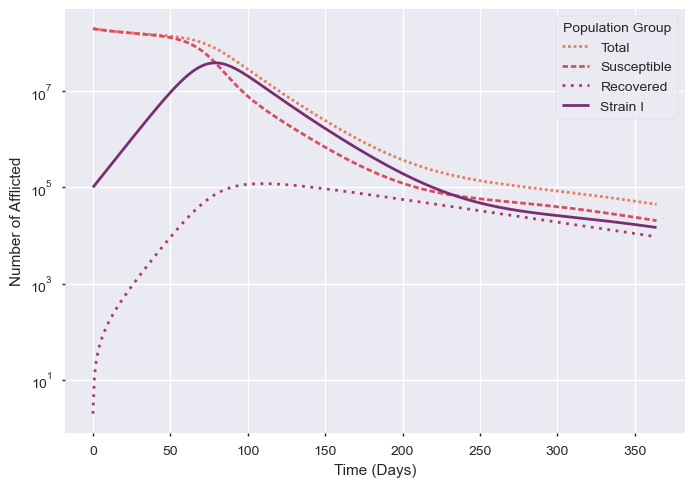

In [71]:
SEIR.plot_simulation(df1)
plt.yscale("log")

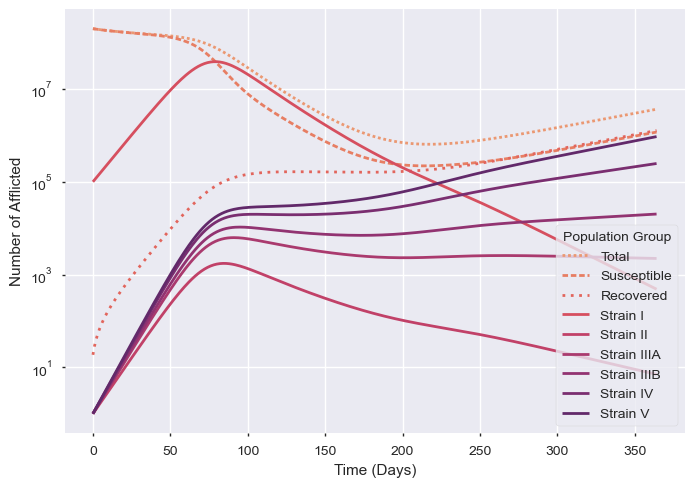

In [73]:
SEIR.plot_simulation(df2)
plt.yscale("log")